In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [3]:
data = pd.read_csv('nifty50.csv')

In [8]:
emd = EMD()
imfs = emd.emd(data['Close'].values)
n_imfs = imfs.shape[0]  

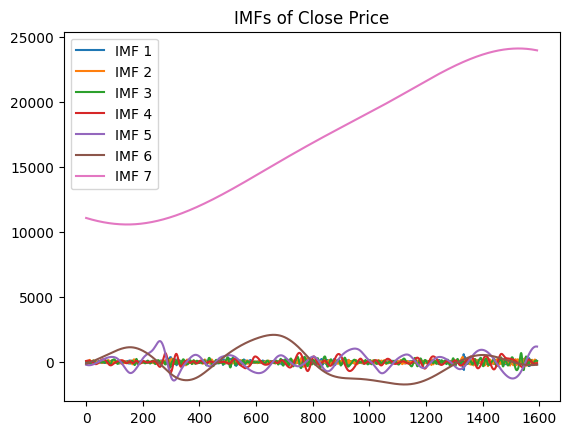

In [11]:
for i, imf in enumerate(imfs):
    plt.plot(imf, label=f'IMF {i+1}')
plt.legend()
plt.title('IMFs of Close Price')
plt.show()

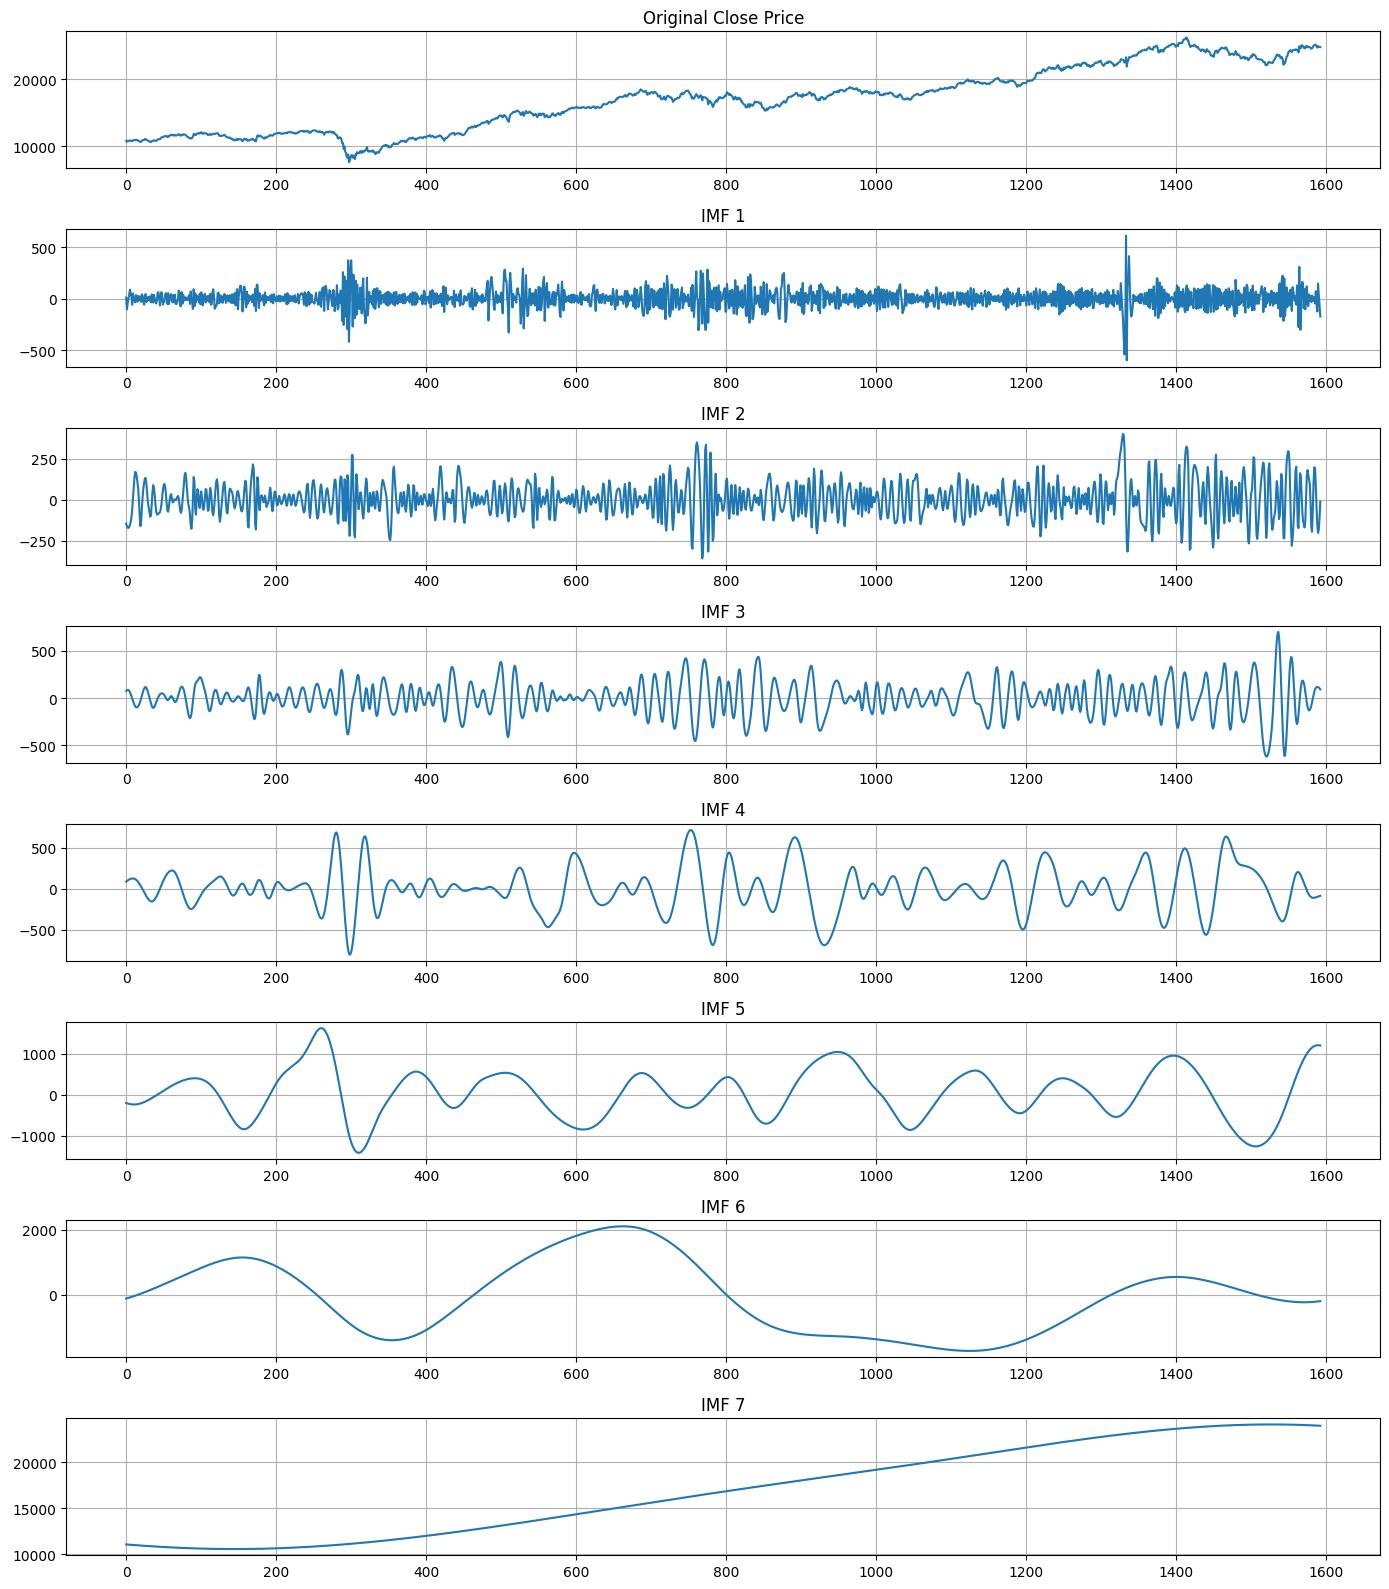

In [13]:
plt.figure(figsize=(14, 2 * (n_imfs + 1)))

plt.subplot(n_imfs + 1, 1, 1)
plt.plot(data['Close'], label='Original Close Price')
plt.title("Original Close Price")
plt.grid(True)

for i in range(n_imfs):
    plt.subplot(n_imfs + 1, 1, i + 2)
    plt.plot(imfs[i], label=f'IMF {i+1}')
    plt.title(f"IMF {i+1}")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

def build_custom_lstm(input_shape):
    model = Sequential()

    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units=60, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(units=80, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(units=120, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

window_size = 60
final_predictions = []

for i, imf in enumerate(imfs):
    print(f"\nTraining on IMF {i+1}...")

    # Reshape and scale
    imf = imf.reshape(-1, 1)
    scaler = MinMaxScaler()
    imf_scaled = scaler.fit_transform(imf)

    # Split
    split = int(len(imf_scaled) * 0.8)
    train_data = imf_scaled[:split]
    test_data = imf_scaled[split - window_size:]

    # Create sequences
    x_train, y_train = [], []
    for j in range(window_size, len(train_data)):
        x_train.append(train_data[j-window_size:j])
        y_train.append(train_data[j])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_test, y_test = [], []
    for j in range(window_size, len(test_data)):
        x_test.append(test_data[j-window_size:j])
        y_test.append(test_data[j])
    x_test, y_test = np.array(x_test), np.array(y_test)

    # Reshape
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # Build and train the model
    model = build_custom_lstm(input_shape=(x_train.shape[1], 1))
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict and inverse transform
    y_pred = model.predict(x_test)
    y_pred = scaler.inverse_transform(y_pred)

    final_predictions.append(y_pred)



Training on IMF 1...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step

Training on IMF 2...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

Training on IMF 3...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

Training on IMF 4...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step

Training on IMF 5...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

Training on IMF 6...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

Training on IMF 7...


c:\Users\ayush\OneDrive\Desktop\data-science_learning\stock price prediction\projenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


Final RMSE (EMD + Stacked LSTM): 1523.04
Final MAE: 1486.19


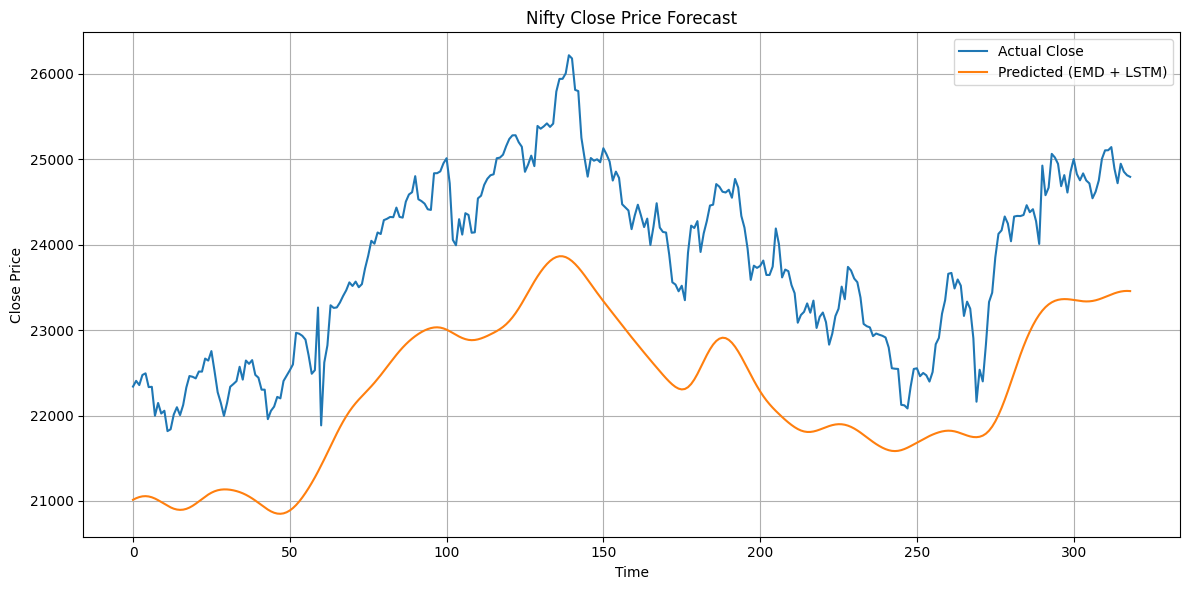

In [19]:
# Combine IMF predictions
final_close_pred = np.sum(np.hstack(final_predictions), axis=1)

# Actual Close prices for same test length
true_close_test = data['Close'].values[-len(final_close_pred):]

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(true_close_test, final_close_pred))
mae = mean_absolute_error(true_close_test, final_close_pred)

print(f"Final RMSE (EMD + Stacked LSTM): {rmse:.2f}")
print(f"Final MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_close_test, label='Actual Close')
plt.plot(final_close_pred, label='Predicted (EMD + LSTM)')
plt.title("Nifty Close Price Forecast")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
